# Przewidywanie wyniku meczu piłkarskiego

## Przygotowanie zbioru

Zacznijmy od wczytania danych

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
import pandas as pd
import numpy as np

df = pd.read_pickle('../data/ml_data.pkl')

In [62]:
df.head()

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_4_age,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year
0,24,2,1,1,0,0,0,0,0,0,...,21,21,22,23,27,27,26,19,2,2009
1,22,2,2,1,0,0,0,0,0,0,...,25,23,25,22,19,29,23,21,12,2010
2,8,0,2,1,0,0,0,0,0,0,...,24,22,25,22,20,19,22,21,9,2010
3,6,2,2,1,0,0,0,0,0,0,...,24,22,29,25,22,19,22,21,9,2010
4,30,0,1,1,0,0,0,0,0,0,...,23,23,29,23,25,19,23,21,3,2011


In [63]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

Popatrzmy na kolumny jakie ma nasza wczytana tabela

In [64]:
print_full(df.columns.values)

array(['stage', 'home_team_goal', 'away_team_goal',
       'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositionin

Nasze dane składają się z:
- kolejka rozgrywania meczu,
- liczba strzelonych goli przez drużynę grającą u siebie
- liczba strzelonych goli przez drużynę grającą na wyjeździe
- liga rozgrywania meczu (one hot encoding)
- średnie kursy bukmacherów
- statystki drużyny z gry FIFA (0-100),
- statystyki piłkarz z gry FIFA (0-100)
- data rozegrania meczu (miesiąc, rok)

Jako, że chcemy przewidywać, która drużyna wygra lub czy będzie remis musimy zmienić kolumny z golami strzelonymi przez drużyny na one hot encoding

In [65]:
df["result"] = df.apply(lambda r: (-1 if r["home_team_goal"] > r["away_team_goal"] else 1 if r["home_team_goal"] < r["away_team_goal"] else 0), axis=1)

In [66]:
df['result']

0       -1
1        0
2        1
3        0
4        1
        ..
19607   -1
19608   -1
19609    0
19610   -1
19611   -1
Name: result, Length: 19612, dtype: int64

In [67]:
df['home_team_goal']

0        2
1        2
2        0
3        2
4        0
        ..
19607    4
19608    3
19609    1
19610    2
19611    2
Name: home_team_goal, Length: 19612, dtype: int64

In [68]:
df['away_team_goal']

0        1
1        2
2        2
3        2
4        1
        ..
19607    0
19608    0
19609    1
19610    0
19611    0
Name: away_team_goal, Length: 19612, dtype: int64

In [69]:
df = pd.get_dummies(df, columns=['result'])

In [70]:
df

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,result_-1,result_0,result_1
0,24,2,1,1,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,2,2,1,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,0,2,1,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,2,2,1,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,0,1,1,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,4,0,0,0,0,1,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,3,0,0,0,0,1,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,1,1,0,0,0,1,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,2,0,0,0,0,1,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


In [71]:
df = df.drop(["home_team_goal", "away_team_goal"], axis=1)

In [72]:
df = df.rename(columns={"result_-1": "win", "result_0": "draw", "result_1": "lost"})

In [73]:
print_full(df.head())

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,

Popatrzmy jeszcze raz na kolumny jakie teraz mamy. Widzimy, że w zbiorze są kolumny na temat zakładów u bukmachera. Pozbędziemy się ich, ponieważ mogę wpływać na naszą sieć, a my chcemy przewidywać wyniki meczy na podstawie czynników, które mają na nie wpływ.

In [74]:
print_full(df.columns.values)

array(['stage', 'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositioningClass_Organised',
       'home_team_chance

In [75]:
df = df.drop(["avg_odds_home_win", "avg_odds_draw", "avg_odds_away_win", "month", "year"], axis=1)

In [76]:
print_full(df.describe())

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_acceleration,home_player_3_sprint_speed,home_player_3_agility,home_player_3_reactions,home

Nasze dane składają się z:
- kolejka
- liga, w której rozgrywany jest mecz. Największa ilość meczy jest z ligi angielskiej i francuskiej, zaraz za nimi są liga hiszpańska i niemiecka. Ta informacja jest nam potrzebna
- kolejne kolumny to statystyki z gry FIFA drużyn i zawodników. Są to najważniejsze statystyki, od których na pewno zależy wynik meczu
- wiek zawodników. Według nas ma wpływ na wynik meczu dlatego uwzględnimy go w trenowaniu sieci
- rezultat meczu jako one hot encoding, gdzie win oznacza zwycięstwo drużyny, która gra u siebie. Analogicznie lost

### Rozkład danych

In [77]:
win_count = df['win'].sum()
draw_count = df['draw'].sum()
lost_count = df['lost'].sum()

total = win_count + draw_count + lost_count
print('Examples:\n    Total: {}\n    Win: {} ({:.2f}% of total)\n    Draw: {} ({:.2f}% of total)\n    Lost: {} ({:.2f}% of total)\n'.format(
    total, win_count, 100 * win_count / total,
    draw_count, draw_count * 100 / total,
    lost_count, lost_count * 100 / total))

Examples:
    Total: 19612
    Win: 9003 (45.91% of total)
    Draw: 4953 (25.25% of total)
    Lost: 5656 (28.84% of total)



### Podział i normalizacja danych
Zanim przystąpimy do treningu naszej podzielmy nasz cały zbiór na zbiory: uczący, walidacyjny, testowy

In [78]:
input_shape = len(df.columns.values) - 3 
X = df.iloc[:, :-3].to_numpy()
y = df.iloc[:, -3:].to_numpy()
input_shape

866

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

Następnie przeskalujmy dane używając StandardScaler. Po tej operacji średnia będzie wynosić 0, a odchylenie standardowe 1

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Wstępny model
Przewidywanie modelu możemy potraktować jako zadanie klasyfikacji wieloklasowej. W tym przypadku mecz możemy przyporządkować do jednej z 3 klas: wygrany, zremisowany, przegrany. Na wynik patrzymy okiem drużyny grającej u siebie. Na początek zaczniemy od najprostszej sieci składającej się z 4 warstw. Zanim ją zbudujemy, utwórzmy zbiór X i y.

In [82]:
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.10.0
Keras version: 2.10.0


In [83]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 512)               443904    
                                                                 
 dense_56 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 445,443
Trainable params: 445,443
Non-trainable params: 0
_________________________________________________________________


Zamiast używać `binary_crossentropy`, użyjemy `categorical_crossentropy`, która mierzy odległość między dwoma rozkładami prawdopodobieństwa:
* wynikiem rozkładu prawdopodobieństwa naszej sieci oraz
* prawdziwą dystrybucją etykiet.

Minimalizując odległość między tymi dwoma rozkładami, uczymy nasz model, aby wyprowadzał coś jak najbardziej zbliżonego do prawdziwych etykiet (co nazywamy prawdą fundamentalną (ground truth)).

Jako metrykę użyjemy accuracy

In [84]:
model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Teraz wytrenujmy nasz model dla 100 epok:

In [85]:
epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Epoch 1/100
99/99 [==============================] - 0s 3ms/step - loss: 1.1980 - accuracy: 0.4676 - val_loss: 1.0916 - val_accuracy: 0.5147
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.8748 - accuracy: 0.6009 - val_loss: 1.0832 - val_accuracy: 0.4933
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 0.7539 - accuracy: 0.6716 - val_loss: 1.1193 - val_accuracy: 0.4987
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.7274 - val_loss: 1.1787 - val_accuracy: 0.4634
Epoch 5/100
99/99 [==============================] - 0s 3ms/step - loss: 0.5209 - accuracy: 0.8048 - val_loss: 1.2660 - val_accuracy: 0.4866
Epoch 6/100
99/99 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8395 - val_loss: 1.4782 - val_accuracy: 0.4551
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8828 - val_loss: 1.4320 - val_accuracy: 0.4637
Epoch 8/100
9

In [86]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 802us/step - loss: 3.5208 - accuracy: 0.4611


Przygotujmy sobie funkcje, które przydadzą nam się w dalszych praca. Chodzi o wykres porównujący loss i accuracy.

In [87]:
import matplotlib.pyplot as plt

In [88]:
def PlotLossComparison(loss1, val_loss1):
    plt.clf()
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss 1')
    plt.plot(epochs, val_loss1, 'b', label='Validation loss 1')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [89]:
def PlotAccuracyComparison(acc1, val_acc1):
    plt.clf()
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Pokażmy wykresy strat (loss) i dokładności (accuracy):

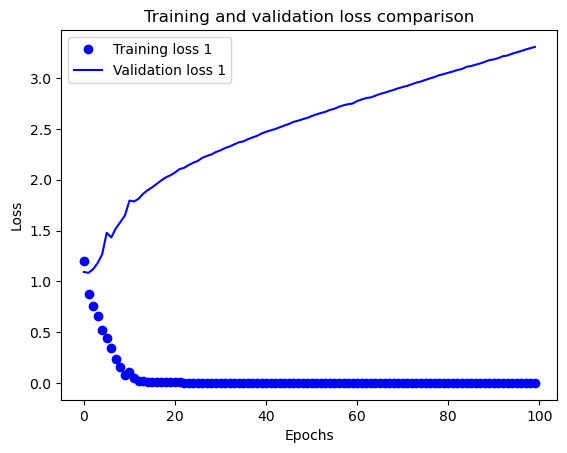

In [90]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

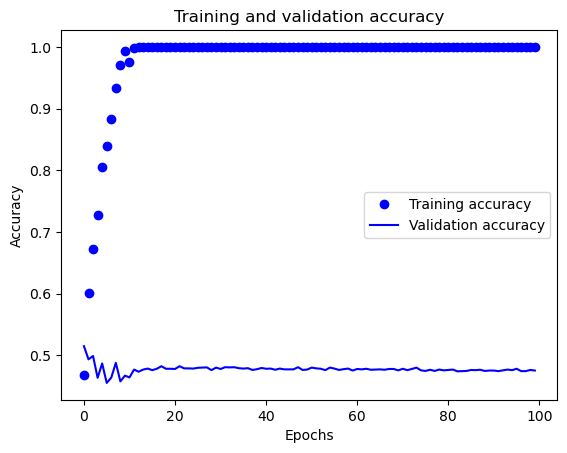

In [91]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Nasza sieć zaczęła się od razu dopasowywać do danych. Problemem, może być zbyt mała złożoność modelu. Spróbujmy zwiększyć złożoność modelu i jeszcze raz nauczyć

In [92]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/100
79/79 [==============================] - 1s 5ms/step - loss: 0.9996 - accuracy: 0.5187 - val_loss: 0.9828 - val_accuracy: 0.5360
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.8986 - accuracy: 0.5815 - val_loss: 1.0156 - val_accuracy: 0.5110
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.7883 - accuracy: 0.6529 - val_loss: 1.1158 - val_accuracy: 0.5141
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6235 - accuracy: 0.7447 - val_loss: 1.2439 - val_accuracy: 0.4914
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.4125 - accuracy: 0.8448 - val_loss: 1.6264 - val_accuracy: 0.4317
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.2377 - accuracy: 0.9166 - val_loss: 1.8359 - val_accuracy: 0.4560
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9437 - val_loss: 2.2535 - val_accuracy: 0.4600
Epoch 8/100
7

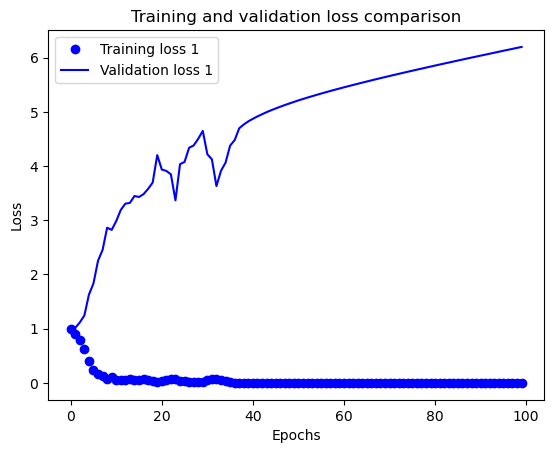

In [93]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

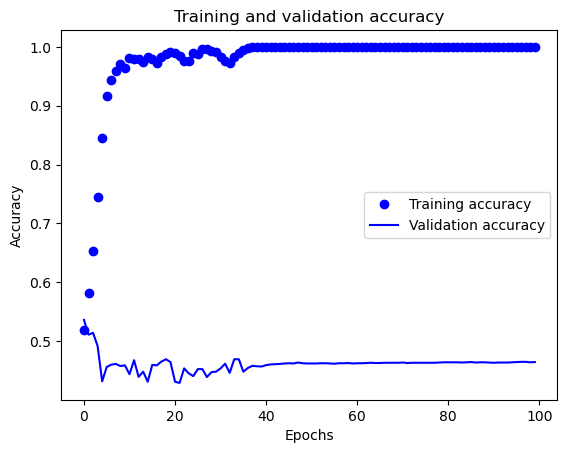

In [94]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Model nadal się przeucza. W następnych częściach skupimy się na optymalizacji modelu, aby nie było zjawiska overfittingu

### Optymalizacja modelu
Jako kolejny etap przygotujmy sobie funkcję, która wyświetli macierz konfuzji.

<b>Macierz konfuzji</b> (`confusion matrix`) pokazuje nam, w ilu przypadkach dane testowe zostały poprawnie zaklasyfikowane (główna przekątna macierzy), w ilu niepoprawnie, oraz wzorce których klas byly najczęściej mylone z wzrocami innych klas. 
Macierz konfuzji pozwala przeanalizować, wzorce których klas są najczęściej błędnie klasyfikowane, oraz pozwalają podjąć działania zmierzające do wzmocnienia/powtórzenia procesu uczenia dla tych najtrudniej klasyfikowanych klas lub wzorców, ew. dokonanie augmentacji dla wzorców tych klas, o ile to możliwe. Dlatego w przypadku problemów klasyfikacji macierz konfuzji powinna zostać dokładnie przeanalizowana, a wnioski wykorzystane do poprawy klasyfikatora. Skupiamy się oczywiście na wzorcach tych klas, gdzie wartości poza główną przekątną macierzy są największe. Pomaga również obejrzenie przykładów testowych błędnie sklasyfikowanych, gdyż może się okazać, iż są błędnie przyporządkowane do etykiet albo nawet człowiek lub nikt nie jest w stanie tego zrobić poprawnie ze względu na słabą jakość, rozmycie lub inne czynniki (przekroczenie tzw. "human-level performance"). 

In [95]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
LABELS= ['Win', 'Draw', 'Lost']

# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

123/123 [==============================] - 0s 946us/step


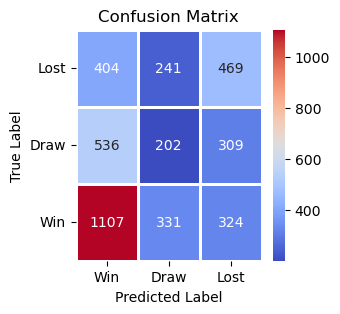

              precision    recall  f1-score   support

           0       0.54      0.63      0.58      1762
           1       0.26      0.19      0.22      1047
           2       0.43      0.42      0.42      1114

    accuracy                           0.45      3923
   macro avg       0.41      0.41      0.41      3923
weighted avg       0.43      0.45      0.44      3923



In [96]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Widzimy, że model najczęściej obstawia zwycięstwo drużyny grającej u siebie. W pozostałych przypadka wygląda jakby strzelał

Jak wygląda liczba przypadków w naszym zbiorze treningowym?

In [97]:
np.sum(y_train, axis=0)

array([5816, 3130, 3605], dtype=uint64)

Nie wiemy jak wygląda zbiór walidacyjny, stanowi on 20% zbioru testowego, lecz nie wiem jak dużo meczy danego typu wpada do niego. Dlatego utwórzmy ten zbiór ręcznie

In [98]:
y_train.shape

(12551, 3)

Popatrzmy teraz jak rozkładają się mecze w zbiorze walidacyjnym

In [99]:
np.sum(y_val, axis=0)

array([1425,  776,  937], dtype=uint64)

Wygląda na to, że zbiór walidacyjny jest w porządku.

Co się stanie, gdy zmniejszymy learning rate?

In [100]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 512)               443904    
                                                                 
 dense_63 (Dense)            (None, 256)               131328    
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dense_65 (Dense)            (None, 3)                 387       
                                                                 
Total params: 608,515
Trainable params: 608,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
99/99 [==============================] - 1s 4ms/step - loss: 1.0758 - accuracy: 0.4585 - val_loss: 1.0486 - val_accuracy: 0.4844
Epoch 2/100
99/99 [===================

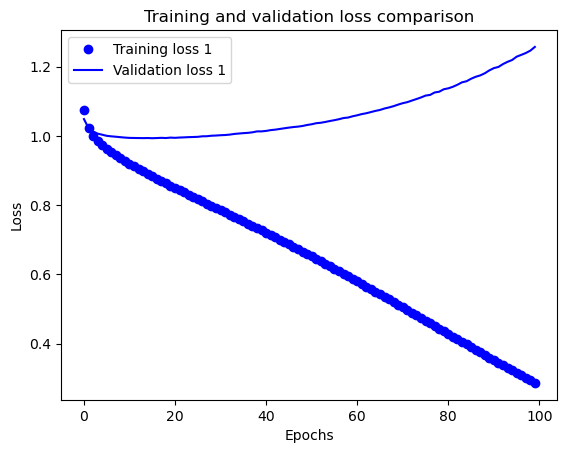

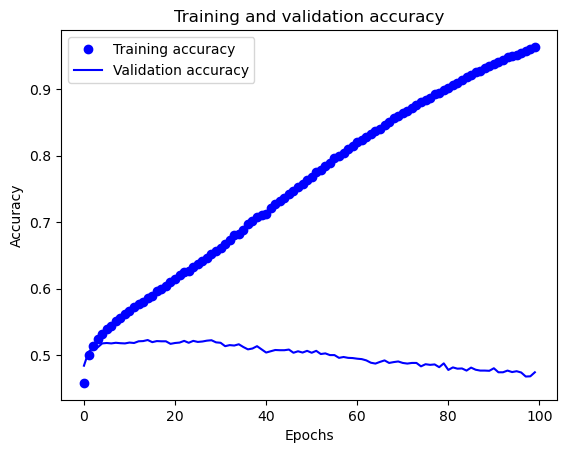

In [101]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [102]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 852us/step - loss: 1.2867 - accuracy: 0.4652


123/123 [==============================] - 0s 840us/step


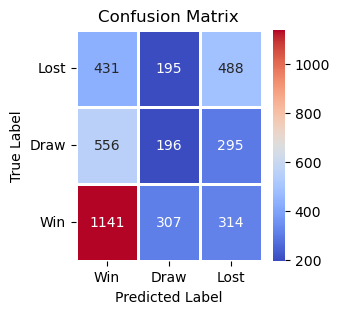

              precision    recall  f1-score   support

           0       0.54      0.65      0.59      1762
           1       0.28      0.19      0.22      1047
           2       0.44      0.44      0.44      1114

    accuracy                           0.47      3923
   macro avg       0.42      0.42      0.42      3923
weighted avg       0.44      0.47      0.45      3923



In [103]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Po zmniejszeniu learning_rate do 10^-5 nasz model później zaczyna się dopasowywać do danych, jednak nadal kuje to w oczy. W następnym kroku zwiększymy jeszcze bardziej złożoność naszego modelu

In [104]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(32, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(8, activation='relu'))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 512)               443904    
                                                                 
 dense_67 (Dense)            (None, 256)               131328    
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 dense_72 (Dense)            (None, 8)               

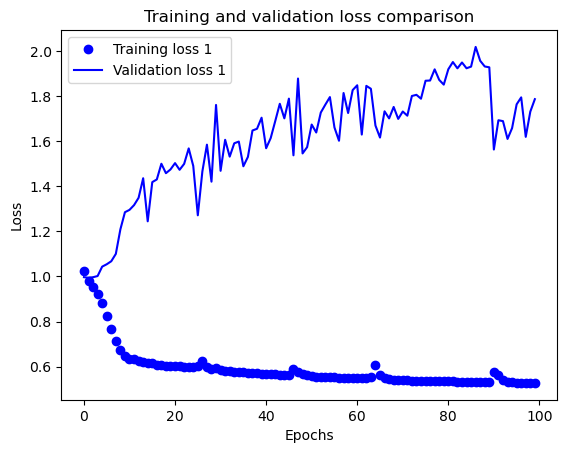

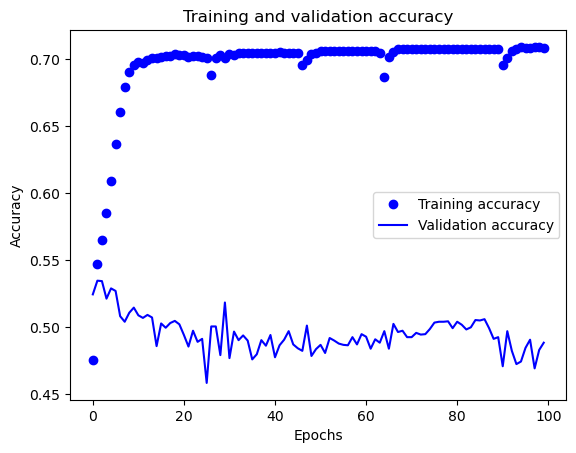

In [105]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 846us/step


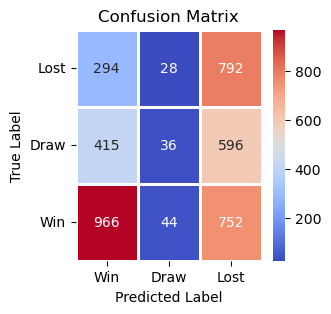

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1762
           1       0.33      0.03      0.06      1047
           2       0.37      0.71      0.49      1114

    accuracy                           0.46      3923
   macro avg       0.43      0.43      0.37      3923
weighted avg       0.45      0.46      0.41      3923



In [106]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Zwiększenie złożoności modelu nie pomogło. Model nadal się przeucza, ale teraz patrząc na macierz konfuzji widzimy, że rozregulował się jeszcze bardziej i strzela gdzie popadnie

In [107]:
model1 = models.Sequential()
model1.add(layers.Dense(256, activation='elu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(128, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(64, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(32, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(16, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(8, activation='elu'))
model1.add(layers.Dropout(0.3))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               221952    
                                                                 
 dropout_27 (Dropout)        (None, 256)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_78 (Dense)            (None, 32)              

In [108]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 713us/step - loss: 2.1051 - accuracy: 0.4277


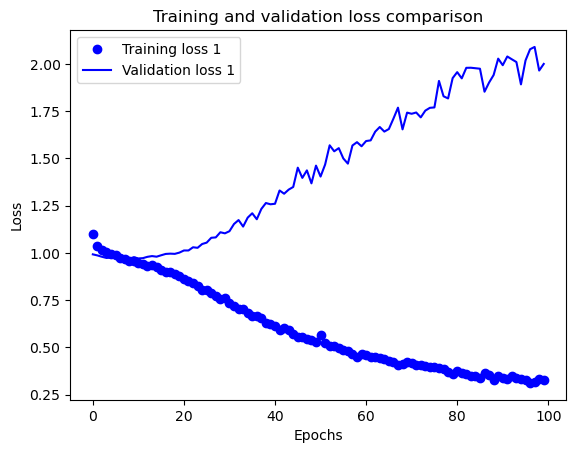

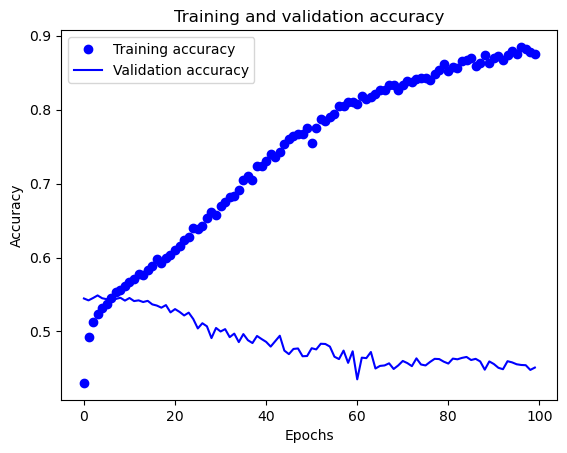

In [109]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 670us/step


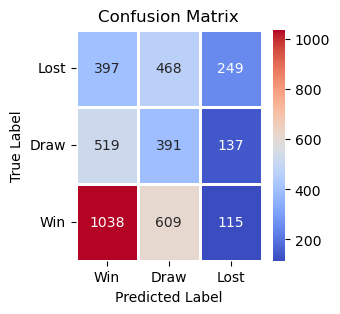

              precision    recall  f1-score   support

           0       0.53      0.59      0.56      1762
           1       0.27      0.37      0.31      1047
           2       0.50      0.22      0.31      1114

    accuracy                           0.43      3923
   macro avg       0.43      0.40      0.39      3923
weighted avg       0.45      0.43      0.42      3923



In [110]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Mozemy spróbować jeszcze bradziej zwiększyć złozoność modelu, jednocześnie zwiększając regularyzację, abu sprawdzić jak wpłynie to na wynik 
treningowy/walidacyjny. Wybieramy tutaj regularyzację L2, gdyz regularyzacja L1 moze prowadzic do całkowitego wyzerowania niektórych wag, 
a nie chcemy tak radykalnie odrzucać części danych  

Oprócz tego, mozemy spróbować zmniejszyć dropout. Losowe wyłączanie 30% neuronów w kazdej warstwie to dość duzo i moze utrudniać uczenie 
sieci. Spróbujmy zmniejszyć dropout do wartości 10%  

Ponadto, spróbujmy zmienić optymizer na Nadam, aby wziąć pod uwagę pęd zmiany gradientu. Aby jednak nasza sieć zbytnio nie 'skakała', 
zmniejszymy learning rate

In [111]:
from tensorflow.keras import regularizers

In [112]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 512)               443904    
                                                                 
 dropout_33 (Dropout)        (None, 512)               0         
                                                                 
 dense_84 (Dense)            (None, 256)               131328    
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                                 
 dense_85 (Dense)            (None, 128)               32896     
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_86 (Dense)            (None, 64)              

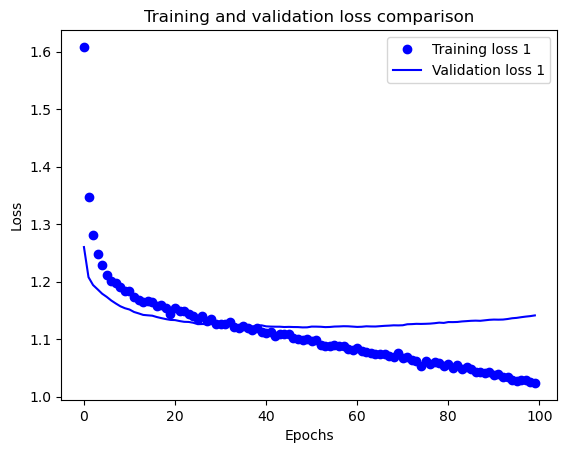

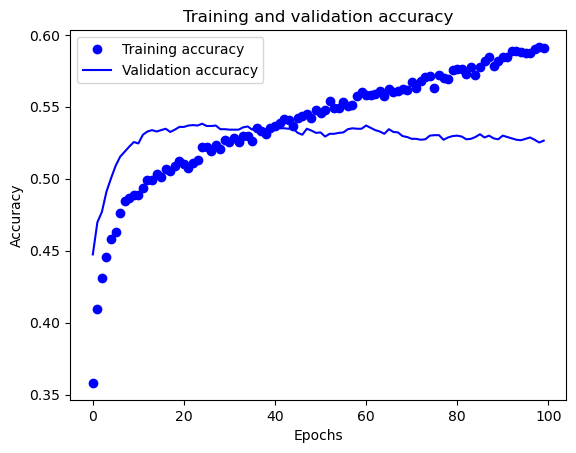

In [113]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


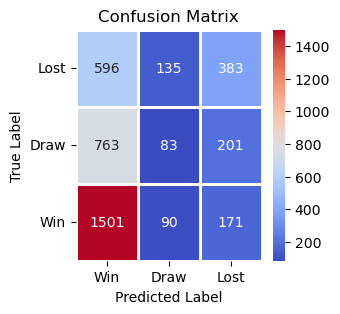

              precision    recall  f1-score   support

           0       0.52      0.85      0.65      1762
           1       0.27      0.08      0.12      1047
           2       0.51      0.34      0.41      1114

    accuracy                           0.50      3923
   macro avg       0.43      0.42      0.39      3923
weighted avg       0.45      0.50      0.44      3923



In [114]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Na powyższych wykresach widzimy, że po około 40 epokach nastąpił overfitting, a accuracy zbioru walidacyjnego nie wzrosło. Nauczmy ten sam model jeszcze raz, ale zatrzymajmy proces uczenia w momencie, kiedy model zacznie overfittować

In [115]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 40        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 512)               443904    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_93 (Dense)            (None, 256)               131328    
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_94 (Dense)            (None, 128)               32896     
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_95 (Dense)            (None, 64)              

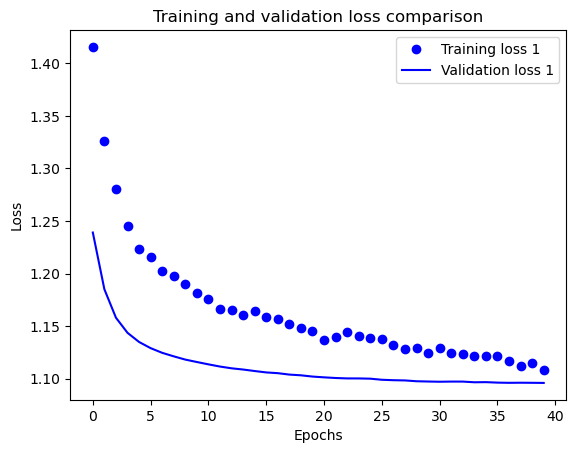

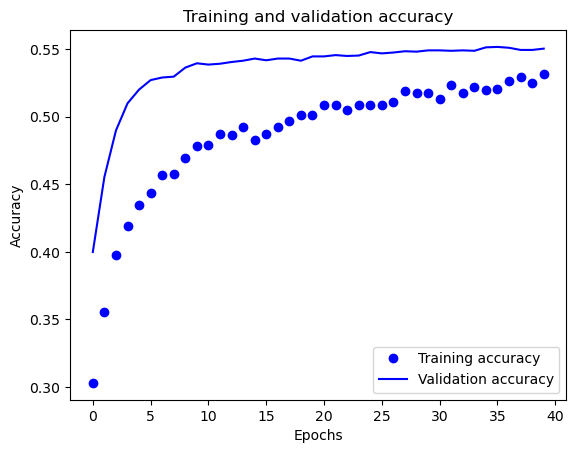

In [116]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 1ms/step


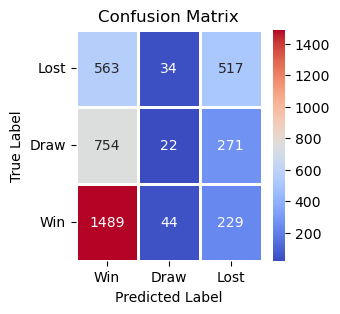

              precision    recall  f1-score   support

           0       0.53      0.85      0.65      1762
           1       0.22      0.02      0.04      1047
           2       0.51      0.46      0.49      1114

    accuracy                           0.52      3923
   macro avg       0.42      0.44      0.39      3923
weighted avg       0.44      0.52      0.44      3923



In [117]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Model teraz się nie przeuczył, ale widzimy, że dużo częściej występują zwycięstwa niż inne rezultaty. Poeksperymentujmy jeszcze z hiperparametrami i zobaczmy co jesteśmy w stanie z tego wyciągnąć. Delikatnie zwiększmy regularyzacje i liczbę epok

In [118]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 512)               443904    
                                                                 
 dropout_47 (Dropout)        (None, 512)               0         
                                                                 
 dense_102 (Dense)           (None, 256)               131328    
                                                                 
 dropout_48 (Dropout)        (None, 256)               0         
                                                                 
 dense_103 (Dense)           (None, 128)               32896     
                                                                 
 dropout_49 (Dropout)        (None, 128)               0         
                                                                 
 dense_104 (Dense)           (None, 64)              

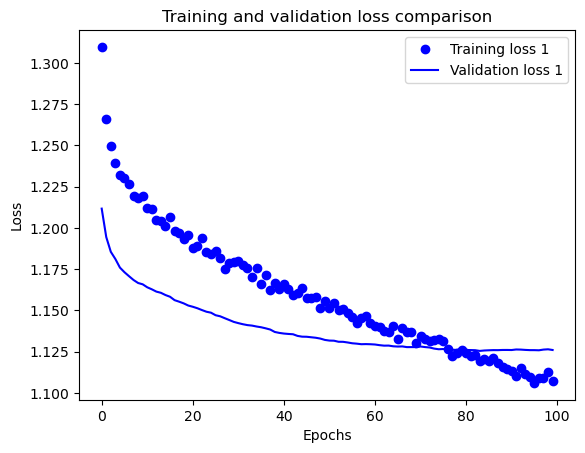

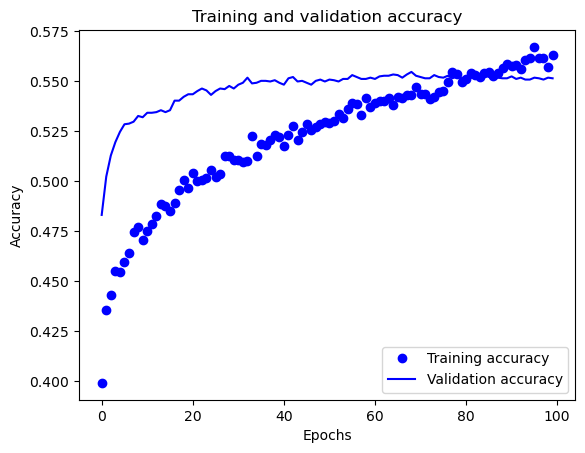

In [119]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Model znowu przeuczył się, ale później. Zmniejszmy liczbę epok i jeszcze raz popatrzmy na macierz konfuzji

In [120]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 75        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 512)               443904    
                                                                 
 dropout_54 (Dropout)        (None, 512)               0         
                                                                 
 dense_111 (Dense)           (None, 256)               131328    
                                                                 
 dropout_55 (Dropout)        (None, 256)               0         
                                                                 
 dense_112 (Dense)           (None, 128)               32896     
                                                                 
 dropout_56 (Dropout)        (None, 128)               0         
                                                                 
 dense_113 (Dense)           (None, 64)              

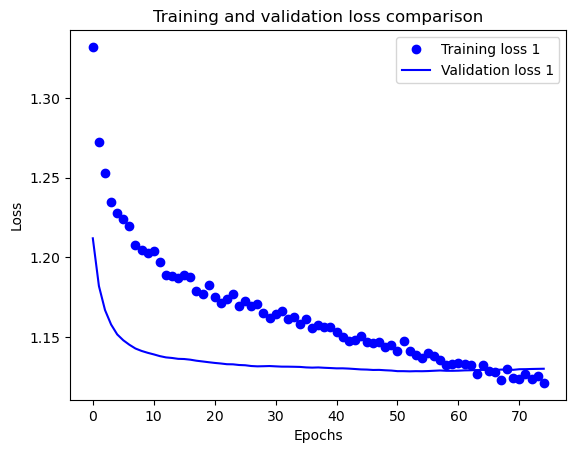

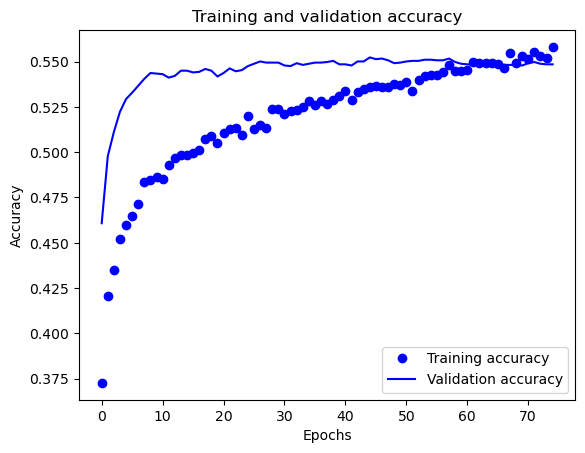

In [121]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [122]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 1ms/step - loss: 1.1748 - accuracy: 0.5162


123/123 [==============================] - 0s 1ms/step


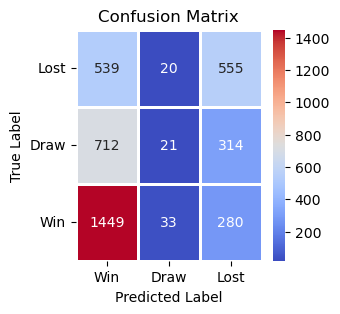

              precision    recall  f1-score   support

           0       0.54      0.82      0.65      1762
           1       0.28      0.02      0.04      1047
           2       0.48      0.50      0.49      1114

    accuracy                           0.52      3923
   macro avg       0.43      0.45      0.39      3923
weighted avg       0.45      0.52      0.44      3923



In [123]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

### Prostsza architektura sieci
Do tej pory zazwyczaj zaczynaliśmy juz od dość duzej liczby neuronów (512 na pierwszej warstwie).  
Tym razem spróbujemy znacznie uprościć model i zacząć od 64, oczywiści pamiętając, ze prawdopodobnie będzie nalezalo
wydłuzyć proces uczenia

In [153]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_257 (Dense)           (None, 64)                55488     
                                                                 
 dropout_160 (Dropout)       (None, 64)                0         
                                                                 
 dense_258 (Dense)           (None, 32)                2080      
                                                                 
 dropout_161 (Dropout)       (None, 32)                0         
                                                                 
 dense_259 (Dense)           (None, 16)                528       
                                                                 
 dropout_162 (Dropout)       (None, 16)                0         
                                                                 
 dense_260 (Dense)           (None, 8)               

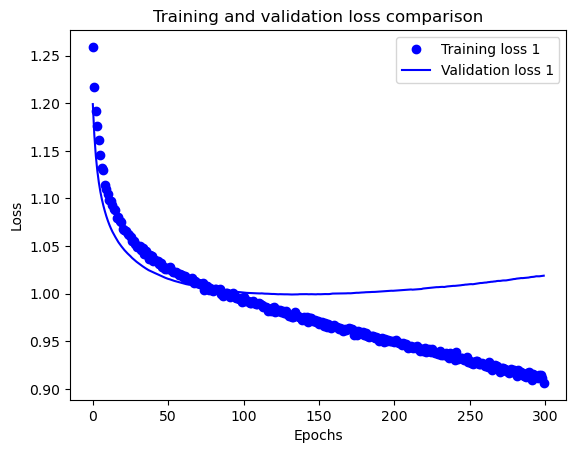

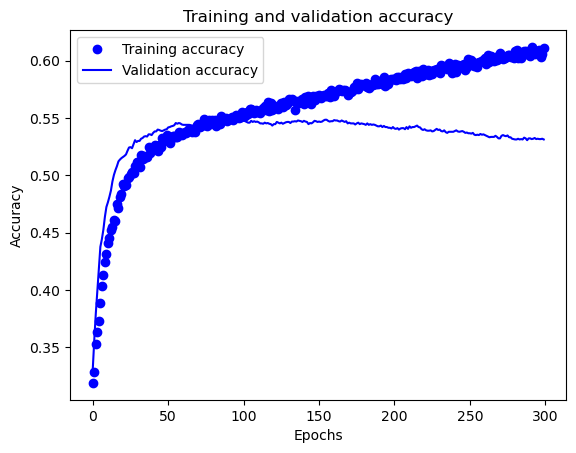

In [154]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [155]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 491us/step - loss: 1.0605 - accuracy: 0.5070


123/123 [==============================] - 0s 460us/step


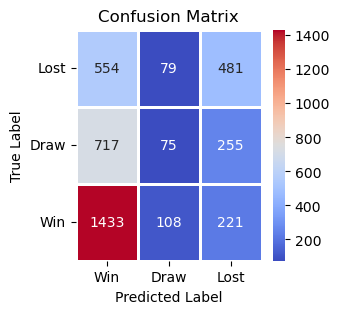

              precision    recall  f1-score   support

           0       0.53      0.81      0.64      1762
           1       0.29      0.07      0.11      1047
           2       0.50      0.43      0.46      1114

    accuracy                           0.51      3923
   macro avg       0.44      0.44      0.41      3923
weighted avg       0.46      0.51      0.45      3923



In [156]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Póki co wyniki nie są lepsze od poprzednich rozwiązań, a nawet przeciwnie. Teraz więc spróbujemy zastosować bardziej 
skomplikowany kształt sieci - romb. Złozoność sieci znów wzrasta, więc ponownie zmniejszamy liczbę epok do 100

In [157]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(4, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_263 (Dense)           (None, 64)                55488     
                                                                 
 dropout_164 (Dropout)       (None, 64)                0         
                                                                 
 dense_264 (Dense)           (None, 128)               8320      
                                                                 
 dropout_165 (Dropout)       (None, 128)               0         
                                                                 
 dense_265 (Dense)           (None, 256)               33024     
                                                                 
 dropout_166 (Dropout)       (None, 256)               0         
                                                                 
 dense_266 (Dense)           (None, 512)             

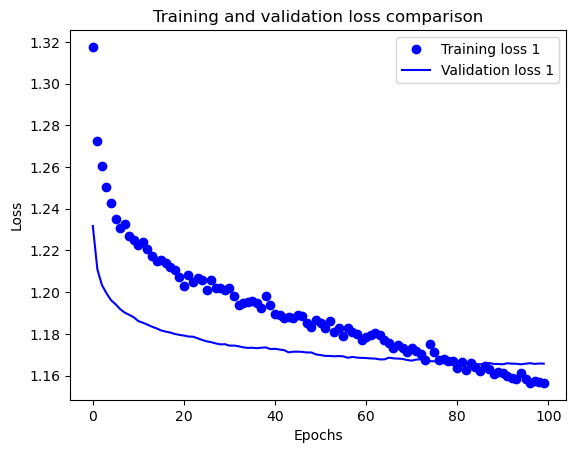

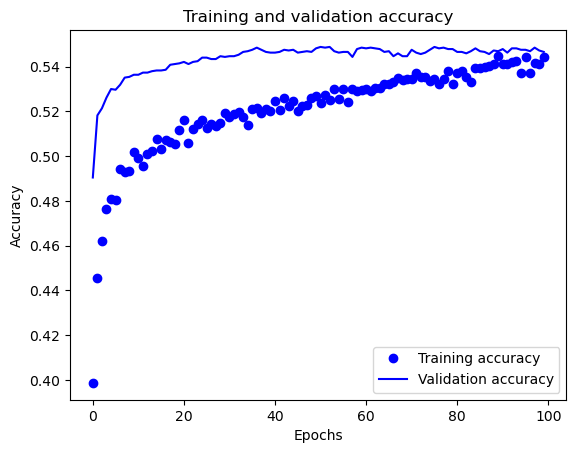

In [158]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [159]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 1ms/step - loss: 1.2019 - accuracy: 0.5167


123/123 [==============================] - 0s 1ms/step


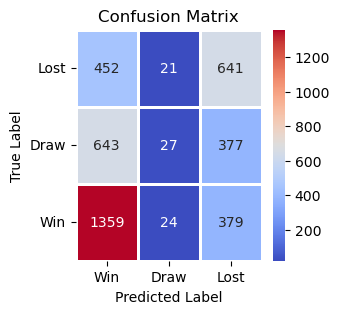

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      1762
           1       0.38      0.03      0.05      1047
           2       0.46      0.58      0.51      1114

    accuracy                           0.52      3923
   macro avg       0.46      0.46      0.40      3923
weighted avg       0.48      0.52      0.45      3923



In [160]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

W przypadku rombu, mamy juz ponownie lepsze wyniki, jednak są w granicach tego co otrzymywaliśmy wcześniej. Teraz więc, spróbujemy 
"uciąć" romb w połowie.

In [161]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 80        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_275 (Dense)           (None, 64)                55488     
                                                                 
 dropout_174 (Dropout)       (None, 64)                0         
                                                                 
 dense_276 (Dense)           (None, 128)               8320      
                                                                 
 dropout_175 (Dropout)       (None, 128)               0         
                                                                 
 dense_277 (Dense)           (None, 256)               33024     
                                                                 
 dropout_176 (Dropout)       (None, 256)               0         
                                                                 
 dense_278 (Dense)           (None, 512)             

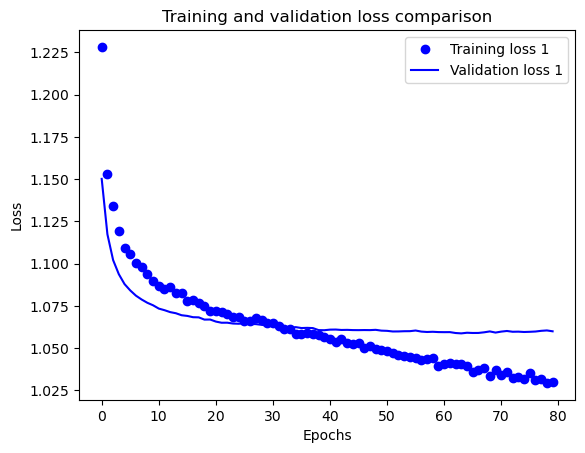

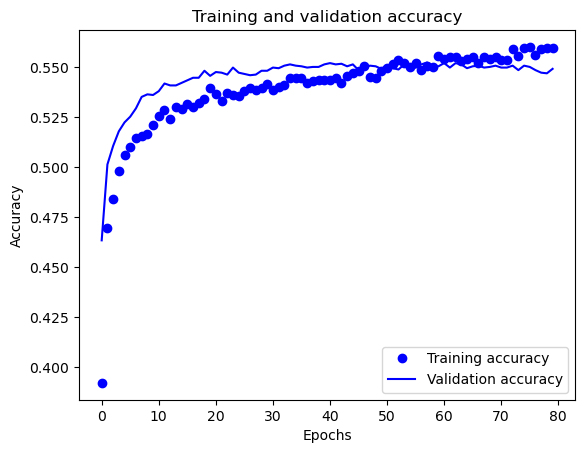

In [162]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

In [163]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 841us/step - loss: 1.0917 - accuracy: 0.5111


123/123 [==============================] - 0s 752us/step


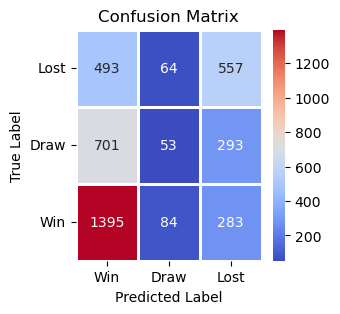

              precision    recall  f1-score   support

           0       0.54      0.79      0.64      1762
           1       0.26      0.05      0.08      1047
           2       0.49      0.50      0.50      1114

    accuracy                           0.51      3923
   macro avg       0.43      0.45      0.41      3923
weighted avg       0.45      0.51      0.45      3923



In [164]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Teraz spróbujmy zacząć od jeszcze mniejszej liczby neuronów, np. 32

In [165]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 80        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 32)                27744     
                                                                 
 dropout_177 (Dropout)       (None, 32)                0         
                                                                 
 dense_281 (Dense)           (None, 64)                2112      
                                                                 
 dropout_178 (Dropout)       (None, 64)                0         
                                                                 
 dense_282 (Dense)           (None, 128)               8320      
                                                                 
 dropout_179 (Dropout)       (None, 128)               0         
                                                                 
 dense_283 (Dense)           (None, 256)             

In [166]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 843us/step - loss: 1.0882 - accuracy: 0.5141


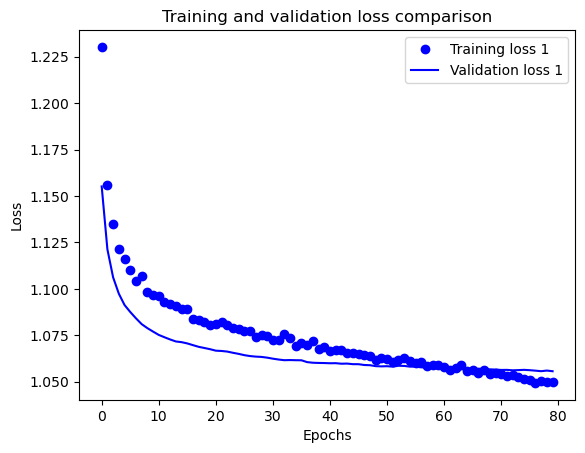

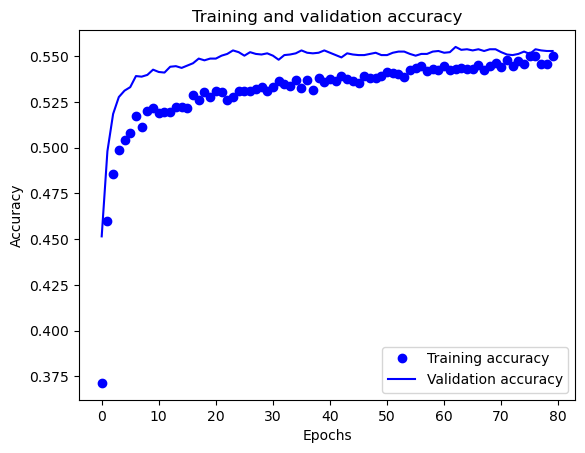

In [167]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

123/123 [==============================] - 0s 844us/step


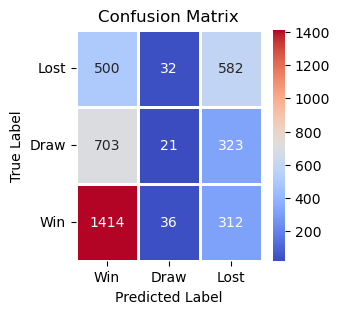

              precision    recall  f1-score   support

           0       0.54      0.80      0.65      1762
           1       0.24      0.02      0.04      1047
           2       0.48      0.52      0.50      1114

    accuracy                           0.51      3923
   macro avg       0.42      0.45      0.39      3923
weighted avg       0.44      0.51      0.44      3923



In [168]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

Udało nam się przekroczyć 55% na zbiorze walidacyjnym i jest to najlepszy jak dotąd wynik!  

Warto równiez zauwazyć, ze przy tym modelu przez wiekszosc procesu uczenia, wynik walidacyjny byl lepszy niz treningowy, co jest 
dość niecodzienną sytuacją. Mozemy więc spróbować wytrenować model na większej ilości epok, np. 300 i zobaczyć, czy wynik będzie dalej 
rósł.

In [170]:
model1 = models.Sequential()
model1.add(layers.Dense(32, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(64, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.1))
model1.add(layers.Dense(512, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.00001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 300        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_292 (Dense)           (None, 32)                27744     
                                                                 
 dropout_185 (Dropout)       (None, 32)                0         
                                                                 
 dense_293 (Dense)           (None, 64)                2112      
                                                                 
 dropout_186 (Dropout)       (None, 64)                0         
                                                                 
 dense_294 (Dense)           (None, 128)               8320      
                                                                 
 dropout_187 (Dropout)       (None, 128)               0         
                                                                 
 dense_295 (Dense)           (None, 256)             

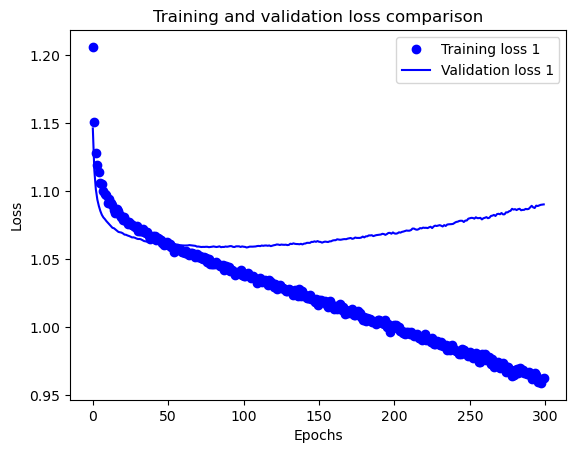

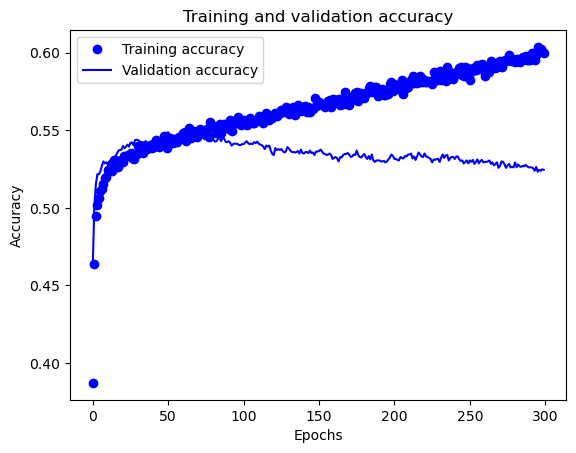

In [171]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

Niestety widzimy, ze po przekroczeniu ok. 100 epok model zaczyna się przeuczać i jego wynik na zbiorze walidacyjnym zaczyna 
spadać, mimo ze wynik treningowy cały czas rośnie. Oznacza to, ze 55% nadal pozostaje naszym najlepszym wynikiem.

### Jeszcze raz na zbiór
Widzimy na macierzy konfuzji, że najlepiej rozpoznawane są mecze zwycięskie. Wpływ na to może mieć niezrównoważenie zbioru

In [ ]:
win_count = df['win'].sum()
draw_count = df['draw'].sum()
lost_count = df['lost'].sum()

total = win_count + draw_count + lost_count
print('Examples:\n    Total: {}\n    Win: {} ({:.2f}% of total)\n    Draw: {} ({:.2f}% of total)\n    Lost: {} ({:.2f}% of total)\n'.format(
    total, win_count, 100 * win_count / total,
    draw_count, draw_count * 100 / total,
    lost_count, lost_count * 100 / total))

Examples:
    Total: 19612
    Win: 9003 (45.91% of total)
    Draw: 4953 (25.25% of total)
    Lost: 5656 (28.84% of total)



Mecze zwycięskie stanowią prawie połowe zbioru, co na pewno wpływa na wyniki. Gdyby zbiór nauczyłby się wybierać tylko mecze zwycięskie otrzymał by wyższą skuteczność niż nasz pierwszy model. Aby pozbyć się tego problemu wykonamy underSampling zmniejszając zbiór meczy zwycięskich do 5000

In [ ]:
df_win = df[df['win']==1]
df_draw = df[df['draw']==1]
df_lost = df[df['lost']==1]

df_win = df_win.sample(5300)
df_undersampling = pd.concat([df_win, df_draw, df_lost], axis=0)

In [ ]:
win_count = df_undersampling['win'].sum()
draw_count = df_undersampling['draw'].sum()
lost_count = df_undersampling['lost'].sum()

total = win_count + draw_count + lost_count
print('Examples:\n    Total: {}\n    Win: {} ({:.2f}% of total)\n    Draw: {} ({:.2f}% of total)\n    Lost: {} ({:.2f}% of total)\n'.format(
    total, win_count, 100 * win_count / total,
    draw_count, draw_count * 100 / total,
    lost_count, lost_count * 100 / total))

Examples:
    Total: 15909
    Win: 5300 (33.31% of total)
    Draw: 4953 (31.13% of total)
    Lost: 5656 (35.55% of total)



### Podział i normalizacja danych
Ponownie musimy podzielić i znormalizować nasz zbiór danych

In [ ]:
input_shape = len(df_undersampling.columns.values) - 3 
X = df_undersampling.iloc[:, :-3].to_numpy()
y = df_undersampling.iloc[:, -3:].to_numpy()
input_shape

866

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

Następnie przeskalujmy dane używając StandardScaler. Po tej operacji średnia będzie wynosić 0, a odchylenie standardowe 1

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Uczenie modelu

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(512, activation='elu', input_shape=(len(df.columns.values) - 3,), kernel_regularizer=regularizers.L2(0.0001)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(256, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(128, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(64, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(32, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(16, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(8, activation='elu', kernel_regularizer=regularizers.L2(0.00015)))
model1.add(layers.Dropout(0.15))
model1.add(layers.Dense(4, activation='elu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

opt = keras.optimizers.Nadam(learning_rate=0.000001)
model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 500        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_val, y_val))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_182 (Dense)           (None, 512)               443904    
                                                                 
 dropout_103 (Dropout)       (None, 512)               0         
                                                                 
 dense_183 (Dense)           (None, 256)               131328    
                                                                 
 dropout_104 (Dropout)       (None, 256)               0         
                                                                 
 dense_184 (Dense)           (None, 128)               32896     
                                                                 
 dropout_105 (Dropout)       (None, 128)               0         
                                                                 
 dense_185 (Dense)           (None, 64)              

80/80 [==============================] - 1s 11ms/step - loss: 1.4134 - accuracy: 0.3682 - val_loss: 1.2802 - val_accuracy: 0.4167
Epoch 41/500
80/80 [==============================] - 1s 11ms/step - loss: 1.4166 - accuracy: 0.3724 - val_loss: 1.2789 - val_accuracy: 0.4175
Epoch 42/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3988 - accuracy: 0.3739 - val_loss: 1.2777 - val_accuracy: 0.4183
Epoch 43/500
80/80 [==============================] - 1s 11ms/step - loss: 1.4099 - accuracy: 0.3704 - val_loss: 1.2767 - val_accuracy: 0.4179
Epoch 44/500
80/80 [==============================] - 1s 11ms/step - loss: 1.4099 - accuracy: 0.3698 - val_loss: 1.2756 - val_accuracy: 0.4195
Epoch 45/500
80/80 [==============================] - 1s 11ms/step - loss: 1.4122 - accuracy: 0.3704 - val_loss: 1.2744 - val_accuracy: 0.4199
Epoch 46/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3949 - accuracy: 0.3680 - val_loss: 1.2731 - val_accuracy: 0.4214
Epoch 47/500

80/80 [==============================] - 1s 10ms/step - loss: 1.3277 - accuracy: 0.4030 - val_loss: 1.2338 - val_accuracy: 0.4466
Epoch 98/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3373 - accuracy: 0.4039 - val_loss: 1.2333 - val_accuracy: 0.4462
Epoch 99/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3430 - accuracy: 0.3962 - val_loss: 1.2328 - val_accuracy: 0.4466
Epoch 100/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3240 - accuracy: 0.4116 - val_loss: 1.2324 - val_accuracy: 0.4470
Epoch 101/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3253 - accuracy: 0.4091 - val_loss: 1.2320 - val_accuracy: 0.4482
Epoch 102/500
80/80 [==============================] - 1s 11ms/step - loss: 1.3437 - accuracy: 0.4035 - val_loss: 1.2315 - val_accuracy: 0.4478
Epoch 103/500
80/80 [==============================] - 1s 10ms/step - loss: 1.3281 - accuracy: 0.4037 - val_loss: 1.2311 - val_accuracy: 0.4478
Epoch 10

80/80 [==============================] - 1s 11ms/step - loss: 1.2929 - accuracy: 0.4235 - val_loss: 1.2157 - val_accuracy: 0.4537
Epoch 155/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2945 - accuracy: 0.4262 - val_loss: 1.2155 - val_accuracy: 0.4540
Epoch 156/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2997 - accuracy: 0.4092 - val_loss: 1.2153 - val_accuracy: 0.4548
Epoch 157/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2921 - accuracy: 0.4242 - val_loss: 1.2151 - val_accuracy: 0.4533
Epoch 158/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2947 - accuracy: 0.4244 - val_loss: 1.2148 - val_accuracy: 0.4533
Epoch 159/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2887 - accuracy: 0.4249 - val_loss: 1.2146 - val_accuracy: 0.4533
Epoch 160/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2881 - accuracy: 0.4246 - val_loss: 1.2145 - val_accuracy: 0.4533
Epoch 

Epoch 211/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2748 - accuracy: 0.4328 - val_loss: 1.2074 - val_accuracy: 0.4564
Epoch 212/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2724 - accuracy: 0.4323 - val_loss: 1.2073 - val_accuracy: 0.4564
Epoch 213/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2756 - accuracy: 0.4288 - val_loss: 1.2071 - val_accuracy: 0.4564
Epoch 214/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2692 - accuracy: 0.4367 - val_loss: 1.2070 - val_accuracy: 0.4572
Epoch 215/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2625 - accuracy: 0.4345 - val_loss: 1.2069 - val_accuracy: 0.4592
Epoch 216/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2781 - accuracy: 0.4317 - val_loss: 1.2068 - val_accuracy: 0.4580
Epoch 217/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2663 - accuracy: 0.4346 - val_loss: 1.2066 - val_accuracy:

Epoch 268/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2570 - accuracy: 0.4352 - val_loss: 1.2023 - val_accuracy: 0.4647
Epoch 269/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2599 - accuracy: 0.4405 - val_loss: 1.2022 - val_accuracy: 0.4647
Epoch 270/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2561 - accuracy: 0.4364 - val_loss: 1.2021 - val_accuracy: 0.4650
Epoch 271/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2533 - accuracy: 0.4392 - val_loss: 1.2020 - val_accuracy: 0.4654
Epoch 272/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2565 - accuracy: 0.4448 - val_loss: 1.2020 - val_accuracy: 0.4654
Epoch 273/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2554 - accuracy: 0.4345 - val_loss: 1.2019 - val_accuracy: 0.4654
Epoch 274/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2494 - accuracy: 0.4468 - val_loss: 1.2019 - val_accuracy:

Epoch 325/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2424 - accuracy: 0.4509 - val_loss: 1.1989 - val_accuracy: 0.4619
Epoch 326/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2495 - accuracy: 0.4448 - val_loss: 1.1989 - val_accuracy: 0.4619
Epoch 327/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2426 - accuracy: 0.4514 - val_loss: 1.1988 - val_accuracy: 0.4619
Epoch 328/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2475 - accuracy: 0.4483 - val_loss: 1.1987 - val_accuracy: 0.4607
Epoch 329/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2433 - accuracy: 0.4448 - val_loss: 1.1987 - val_accuracy: 0.4607
Epoch 330/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2416 - accuracy: 0.4490 - val_loss: 1.1986 - val_accuracy: 0.4607
Epoch 331/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2402 - accuracy: 0.4503 - val_loss: 1.1985 - val_accuracy:

Epoch 382/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2326 - accuracy: 0.4539 - val_loss: 1.1963 - val_accuracy: 0.4623
Epoch 383/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2398 - accuracy: 0.4536 - val_loss: 1.1963 - val_accuracy: 0.4615
Epoch 384/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2354 - accuracy: 0.4589 - val_loss: 1.1962 - val_accuracy: 0.4619
Epoch 385/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2334 - accuracy: 0.4592 - val_loss: 1.1961 - val_accuracy: 0.4619
Epoch 386/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2384 - accuracy: 0.4549 - val_loss: 1.1961 - val_accuracy: 0.4623
Epoch 387/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2383 - accuracy: 0.4557 - val_loss: 1.1961 - val_accuracy: 0.4627
Epoch 388/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2303 - accuracy: 0.4541 - val_loss: 1.1960 - val_accuracy:

Epoch 439/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2267 - accuracy: 0.4560 - val_loss: 1.1940 - val_accuracy: 0.4643
Epoch 440/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2228 - accuracy: 0.4642 - val_loss: 1.1940 - val_accuracy: 0.4647
Epoch 441/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2221 - accuracy: 0.4635 - val_loss: 1.1940 - val_accuracy: 0.4643
Epoch 442/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2251 - accuracy: 0.4603 - val_loss: 1.1940 - val_accuracy: 0.4647
Epoch 443/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2241 - accuracy: 0.4632 - val_loss: 1.1939 - val_accuracy: 0.4643
Epoch 444/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2255 - accuracy: 0.4613 - val_loss: 1.1939 - val_accuracy: 0.4639
Epoch 445/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2226 - accuracy: 0.4625 - val_loss: 1.1939 - val_accuracy:

Epoch 496/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2205 - accuracy: 0.4655 - val_loss: 1.1924 - val_accuracy: 0.4635
Epoch 497/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2197 - accuracy: 0.4701 - val_loss: 1.1923 - val_accuracy: 0.4639
Epoch 498/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2107 - accuracy: 0.4710 - val_loss: 1.1923 - val_accuracy: 0.4643
Epoch 499/500
80/80 [==============================] - 1s 12ms/step - loss: 1.2140 - accuracy: 0.4725 - val_loss: 1.1923 - val_accuracy: 0.4647
Epoch 500/500
80/80 [==============================] - 1s 11ms/step - loss: 1.2159 - accuracy: 0.4663 - val_loss: 1.1923 - val_accuracy: 0.4647


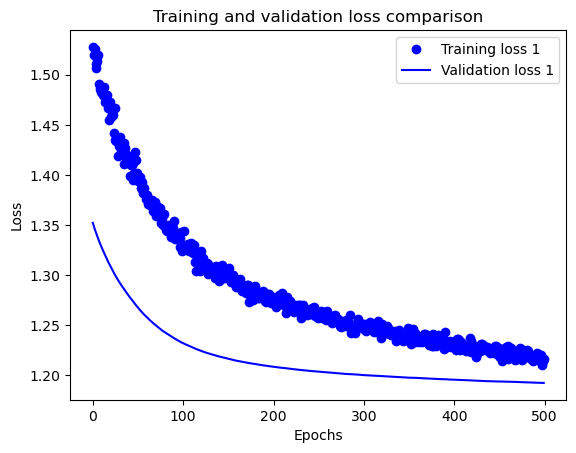

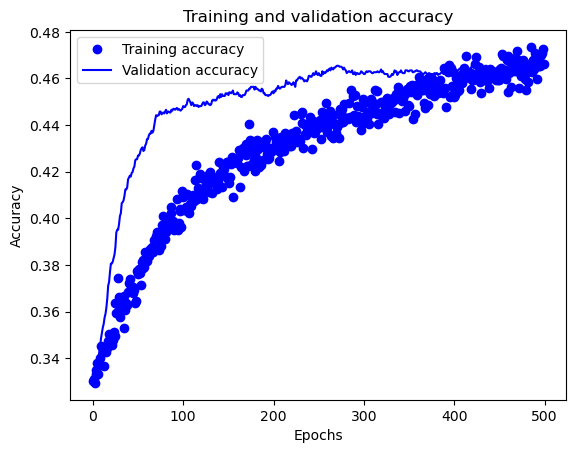

In [ ]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotLossComparison(loss1, val_loss1)
PlotAccuracyComparison(acc1, val_acc1)

100/100 [==============================] - 0s 3ms/step


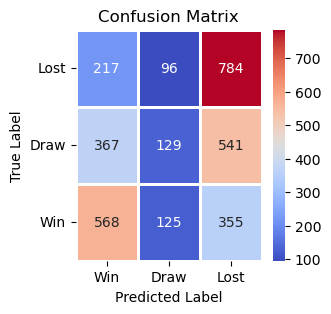

              precision    recall  f1-score   support

           0       0.49      0.54      0.52      1048
           1       0.37      0.12      0.19      1037
           2       0.47      0.71      0.56      1097

    accuracy                           0.47      3182
   macro avg       0.44      0.46      0.42      3182
weighted avg       0.44      0.47      0.43      3182



In [ ]:
test_results_pred = model1.predict(X_test)

# Take the class with the highest probability from the test predictions as a winning one
max_test_results_pred = np.argmax(test_results_pred, axis=1)
max_test_results = np.argmax(y_test, axis=1)


# Show the confusion matrix of the collected results
show_confusion_matrix(max_test_results, max_test_results_pred, num_classes=3)

# Print classification report
print(classification_report(max_test_results, max_test_results_pred))

In [ ]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

100/100 [==============================] - 0s 4ms/step - loss: 1.1929 - accuracy: 0.4654


In [ ]:
- uczymy małą, a potem inicjujemy wagi większej